<a href="https://colab.research.google.com/github/AlyekI/Actividad-1/blob/main/Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib

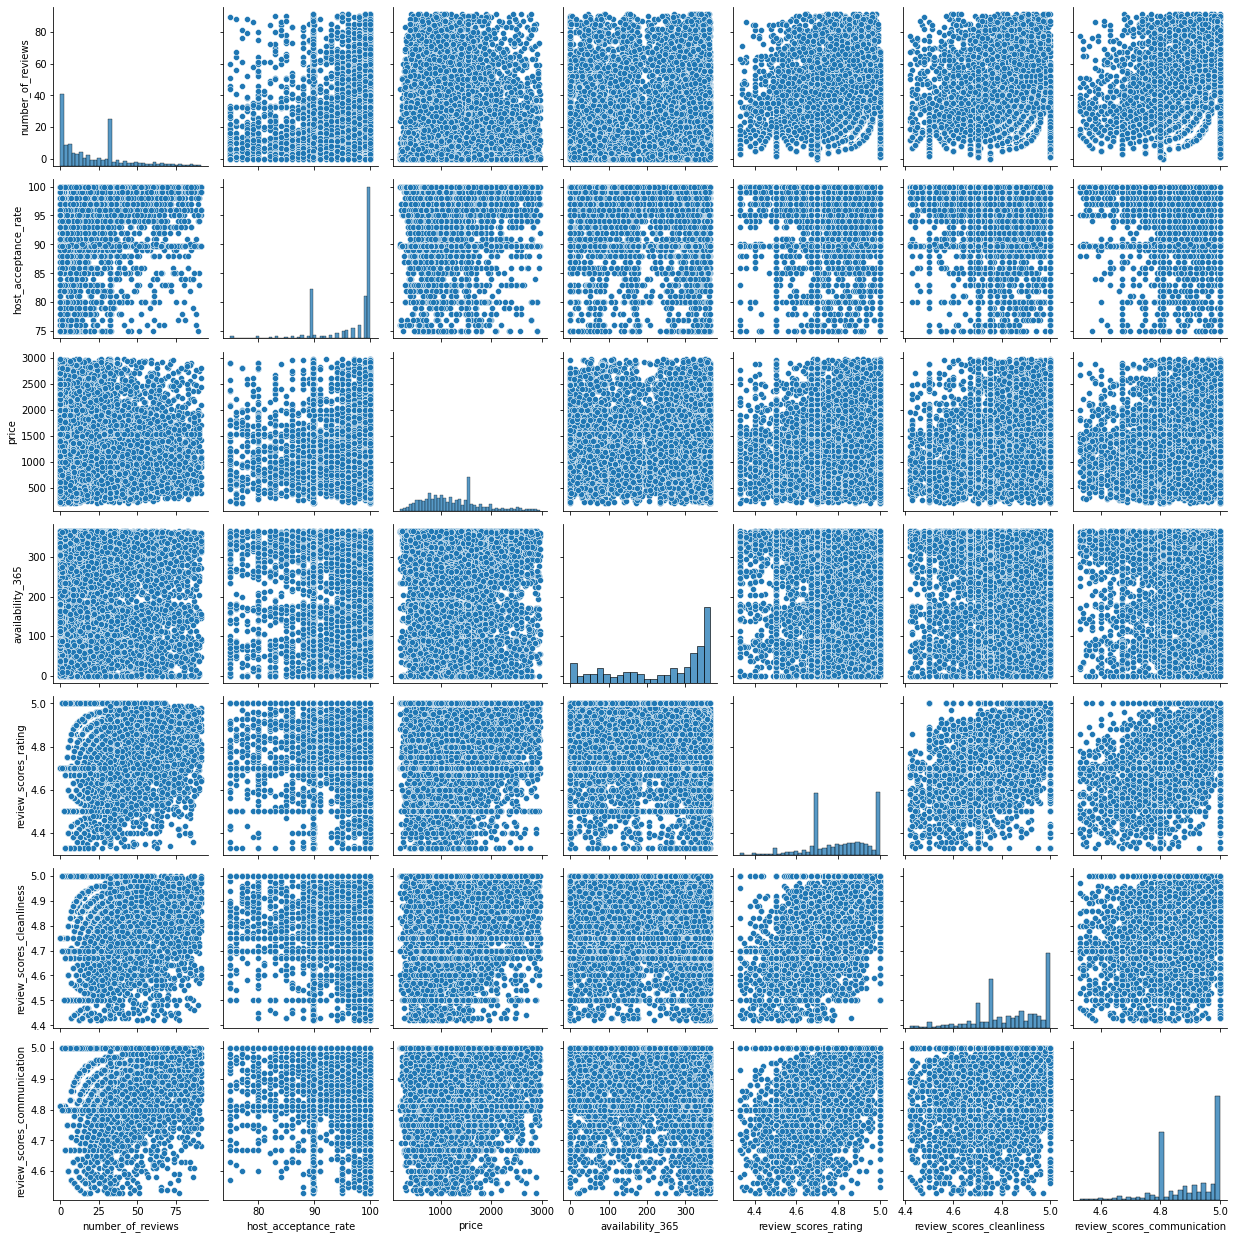

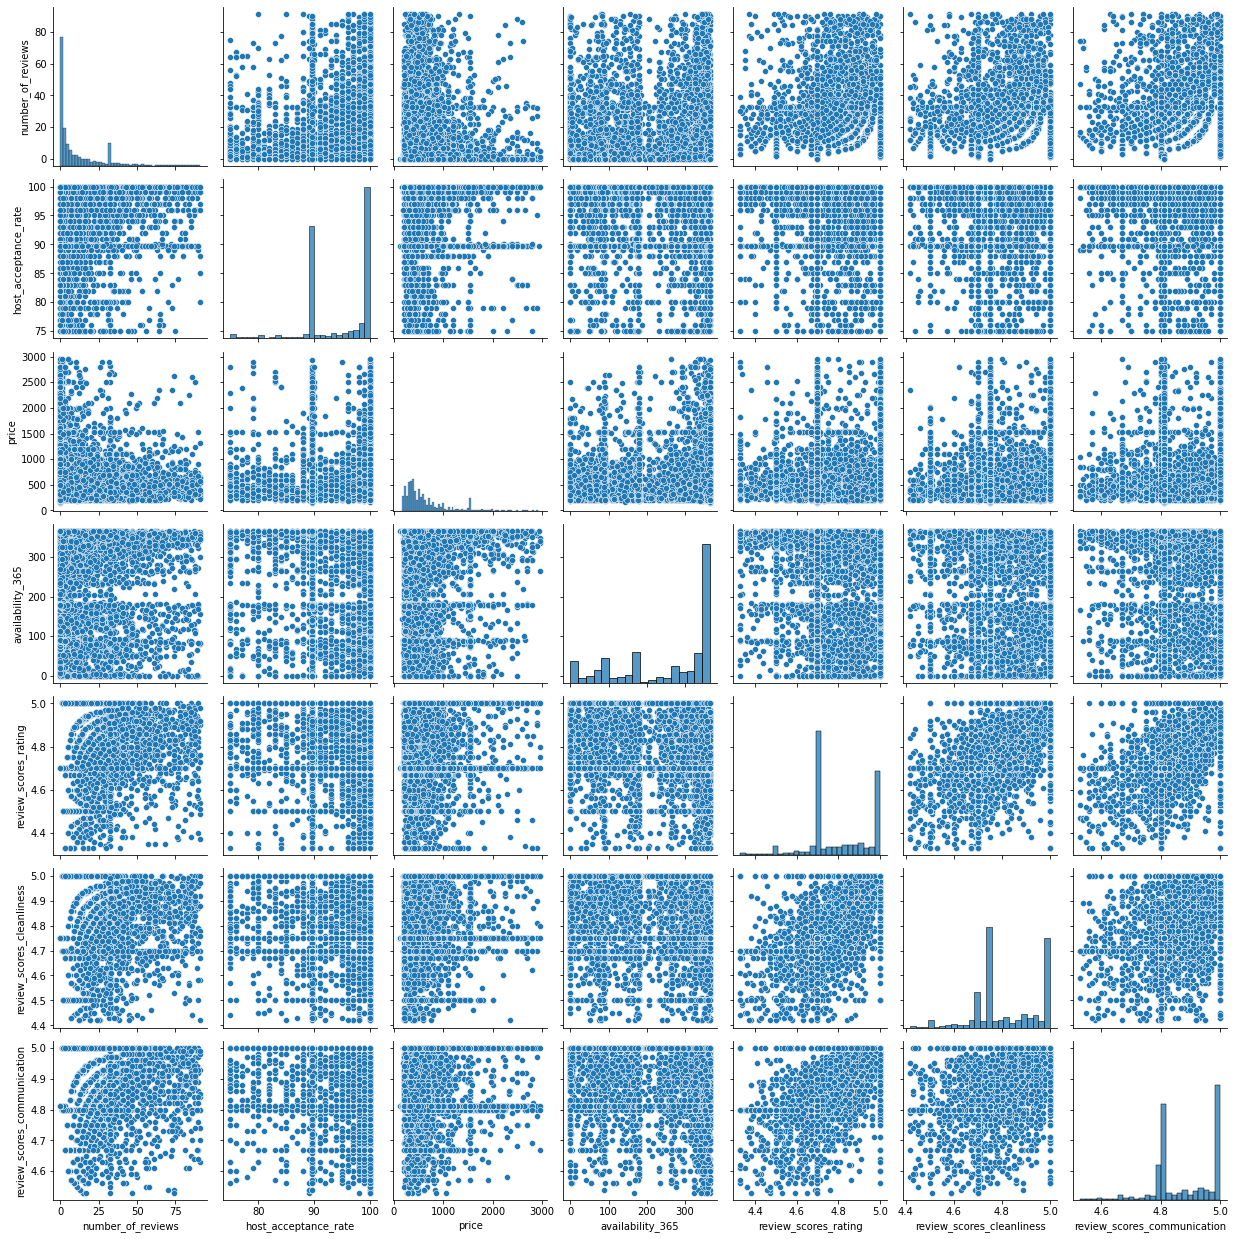

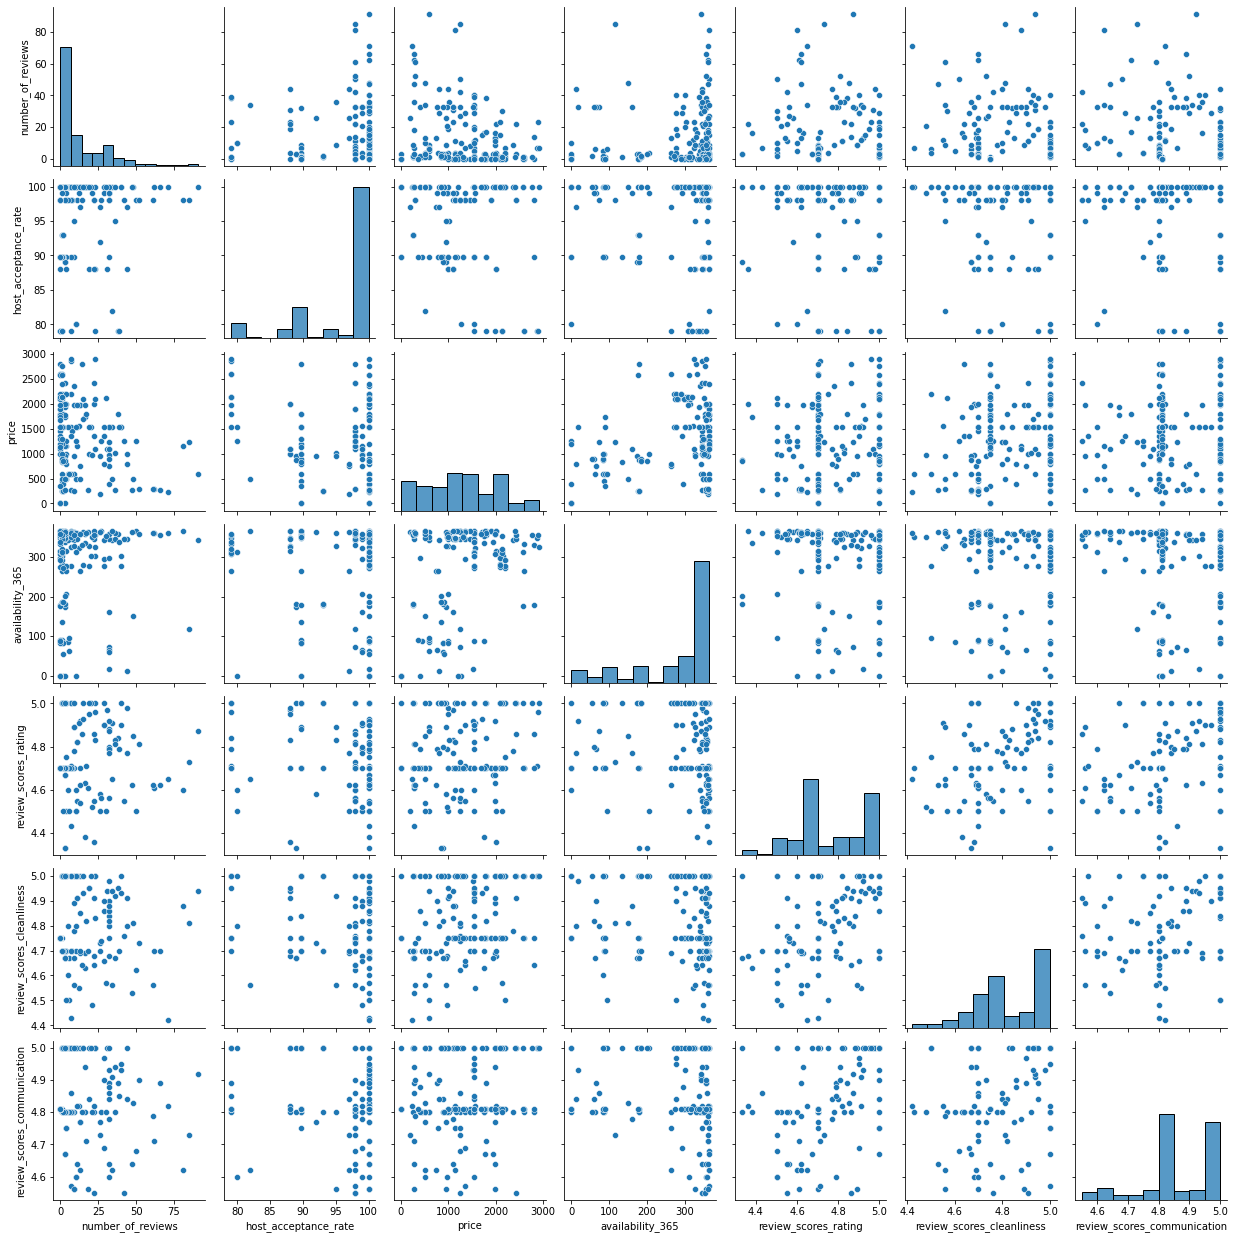

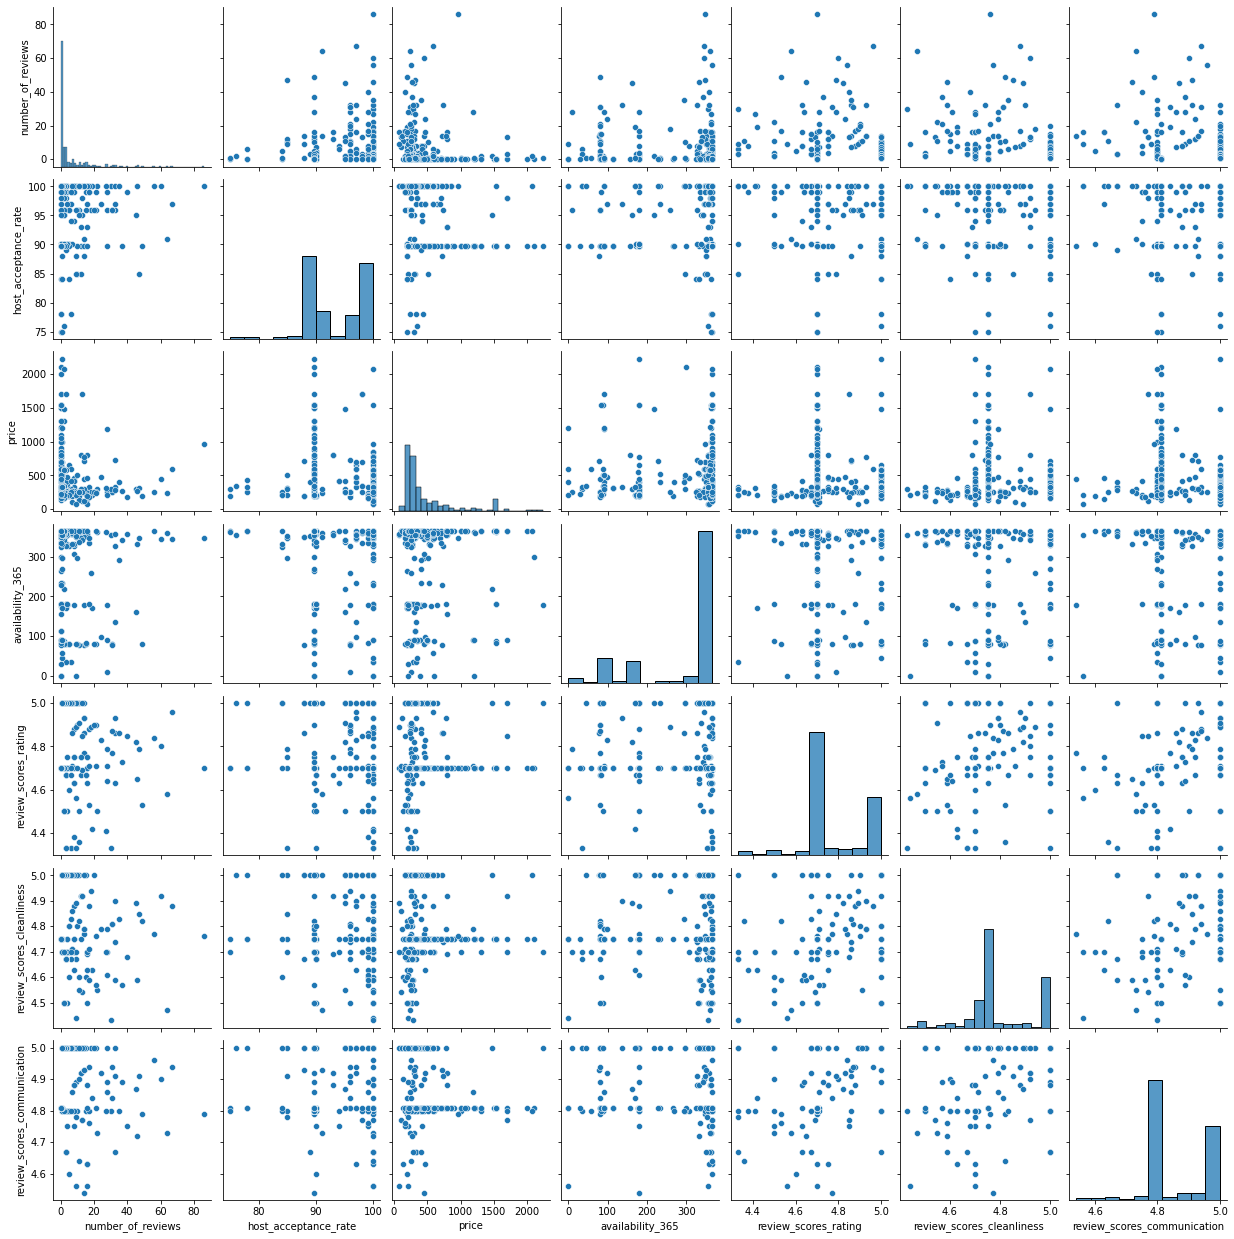

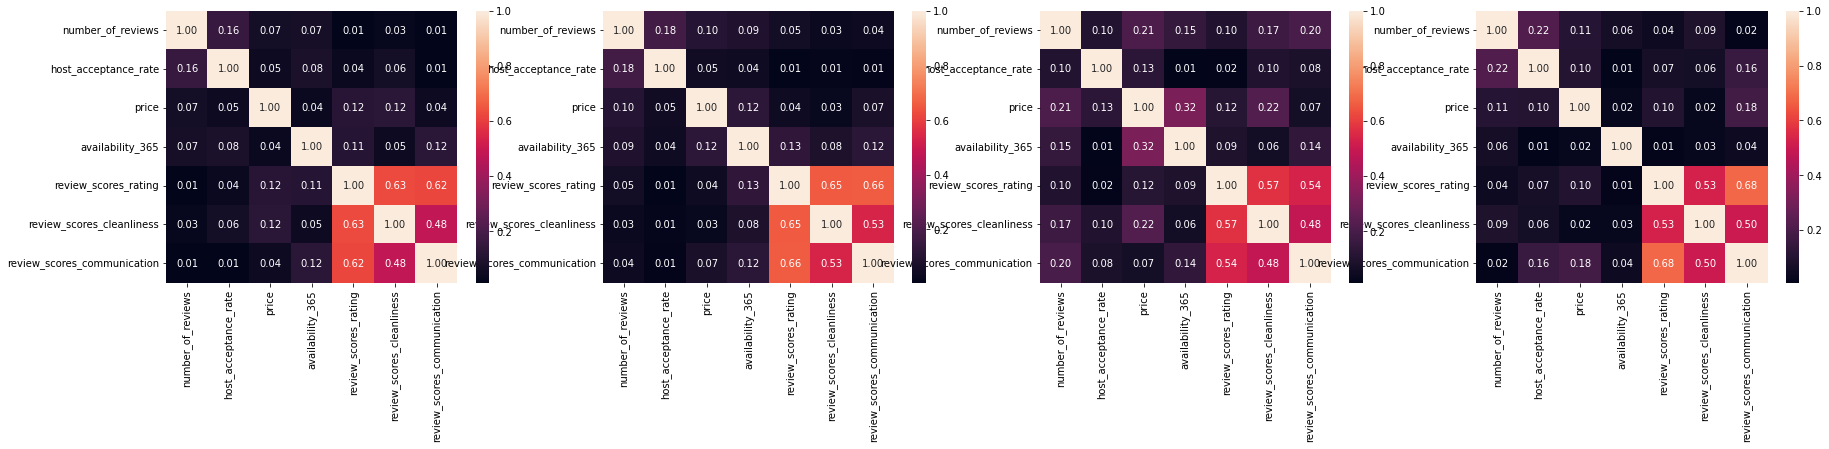

El mejor modelo para el dataset  Entire home/apt  es: y =  0.6348975678360113 *host_acceptance_rate  -39.31343139108138
El mejor modelo para el dataset  Private room  es: y =  0.573027828056219 *host_acceptance_rate  -40.914670511309666
El mejor modelo para el dataset  Shared room  es: y =  0.4682254177860051 *host_acceptance_rate  -38.31766709398862
El mejor modelo para el dataset  Hotel room  es: y =  -0.0053727625635090325 *price +  20.621597417581462


0                     1  \
0                  Tipo de habitación       Entire home/apt   
1     Variables con mayor correlación  Host Acceptance Rate   
2      Coeficiente de Correlación (R)              0.158501   
3  Coeficiente de Determinación (R^2)              0.025123   

                      2                     3           4  
0          Private room           Shared room  Hotel room  
1  Host Acceptance Rate  Host Acceptance Rate       Price  
2              0.180329              0.215574    0.213049  
3              0.032518              0.046472     0.04539

In [ ]:
import pandas as pd
#Se escogen las variables propuestas y se crea el dataframe dff a partir de la base de datos inicial, y se aplica tratamiento de nulos y outliers solo para este.
#En caso de la variable room_type, no es necesario cambiarla de object a numerico categorico
df = pd.read_csv('DF.csv')
dff = df[['room_type', 'number_of_reviews', 'host_acceptance_rate','price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication']]
import numpy as np
from numpy import NaN
#Cambiar object a float
for i in dff.columns[1:]:
  if (dff[i].dtype == 'object'):
    for x,y in zip(dff[i], range(len(dff))):
      if (x!=NaN):
        z = str(x)
        z = z.replace('%','')
        z = z.replace(',','')
        z = z.replace('$','')
        dff[i][y] = z
    dff[i] = pd.to_numeric(dff[i], errors = 'coerce')
#tratamiento de nulos para variables tipo float64 o int64; se usa la media.
for i in dff.columns[1:]:
  if (dff[i].dtype == 'int64'):
    dff[i].fillna(round(dff[i].mean()), inplace = True)
  if (dff[i].dtype == 'float64'):
    dff[i].fillna(round(dff[i].mean(),2), inplace = True)
#tratamiento de outliers 
p25 = dff.quantile(0.25)
p75 = dff.quantile(0.75)
iqr = p75-p25
ls = p75 + 1.5*iqr
li = p25 - 1.5*iqr
dff1 = dff.loc[:, dff.columns != 'room_type'][(dff<=ls)&(dff>=li)]
dff1.fillna(round(dff.mean(),1), inplace = True)
dff1 = pd.concat([dff['room_type'], dff1], axis=1)
#dividir el dataframe por tipos de habitación
E = dff1[dff1['room_type'] == 'Entire home/apt']
P = dff1[dff1['room_type'] == 'Private room']
H = dff1[dff1['room_type'] == 'Hotel room']
S = dff1[dff1['room_type'] == 'Shared room']
import seaborn as sns
sns.pairplot(E)
sns.pairplot(P)
sns.pairplot(H)
sns.pairplot(S)
#Observamos la dispersión de los valores comparando las columnas de cada dataset entre sí.
#Considerando que la variable objetivo es **number_of_reviews** no se observa una correlación significativa con las otras variables,
#se calcula que la correlación maxima seria un R = .2 en la variable host_acceptance_rate y un minimo de R=0 o correlación nula para variables como review_scores
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,4, figsize=(30, 5))
sns.heatmap(abs(E.corr()),annot=True, fmt=".2f", ax=ax[0])
sns.heatmap(abs(P.corr()), annot=True, fmt=".2f", ax=ax[1])
sns.heatmap(abs(H.corr()), annot=True, fmt=".2f", ax=ax[2])
sns.heatmap(abs(S.corr()),annot=True, fmt=".2f",  ax=ax[3])
plt.show()
#Con los mapas de calor representando los coeficientes de correlación se afirman los supuestos del bloque anterior en el que se esperaba un R= .2 como maximo y un R=0 como minimo.
#Para el dataset de 'Entire home/apt' la variable con mayor correlacion con un R= .16 es host_acceptance_rate
#Para el dataset de 'Private room' la variable con mayor correlacion con un R= .18 tambien es host_acceptance_rate
#Para el dataset de 'Hotel room' la variable con mayor correlacion con un R= .21 es price
#Para el dataset de 'Share room' la variable con mayor correlacion con un R= .22 es host_acceptance_rate
from sklearn.linear_model import LinearRegression
l = [E, P, S]
n = [0,1,3]
o = ['Tipo de habitación']
cc = ['Coeficiente de Correlación (R)']
cd = ['Coeficiente de Determinación (R^2)']
for data, x in zip(l, n):
  model= LinearRegression()
  model.fit(X=data[['host_acceptance_rate']], y=data['number_of_reviews'])
  print('El mejor modelo para el dataset ', dff1['room_type'].unique()[x],' es: y = ', model.__dict__['coef_'][0],'*host_acceptance_rate ',model.__dict__['intercept_'])
  cd.append(model.score(data[['host_acceptance_rate']], data['number_of_reviews']))
  cc.append(np.sqrt(model.score(data[['host_acceptance_rate']], data['number_of_reviews'])))
  o.append(dff1['room_type'].unique()[x])
model= LinearRegression()
model.fit(X=H[['price']], y=H['number_of_reviews'])
print('El mejor modelo para el dataset ', dff1['room_type'].unique()[2],' es: y = ', model.__dict__['coef_'][0],'*price + ',model.__dict__['intercept_'])
cd.append(model.score(H[['price']], H['number_of_reviews']))
cc.append(np.sqrt(model.score(H[['price']], H['number_of_reviews'])))
o.append(dff1['room_type'].unique()[2])
varc = ['Variables con mayor correlación','Host Acceptance Rate', 'Host Acceptance Rate', 'Host Acceptance Rate', 'Price']
Tabla = [o,varc,cc,cd]
pd.DataFrame(Tabla)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return s

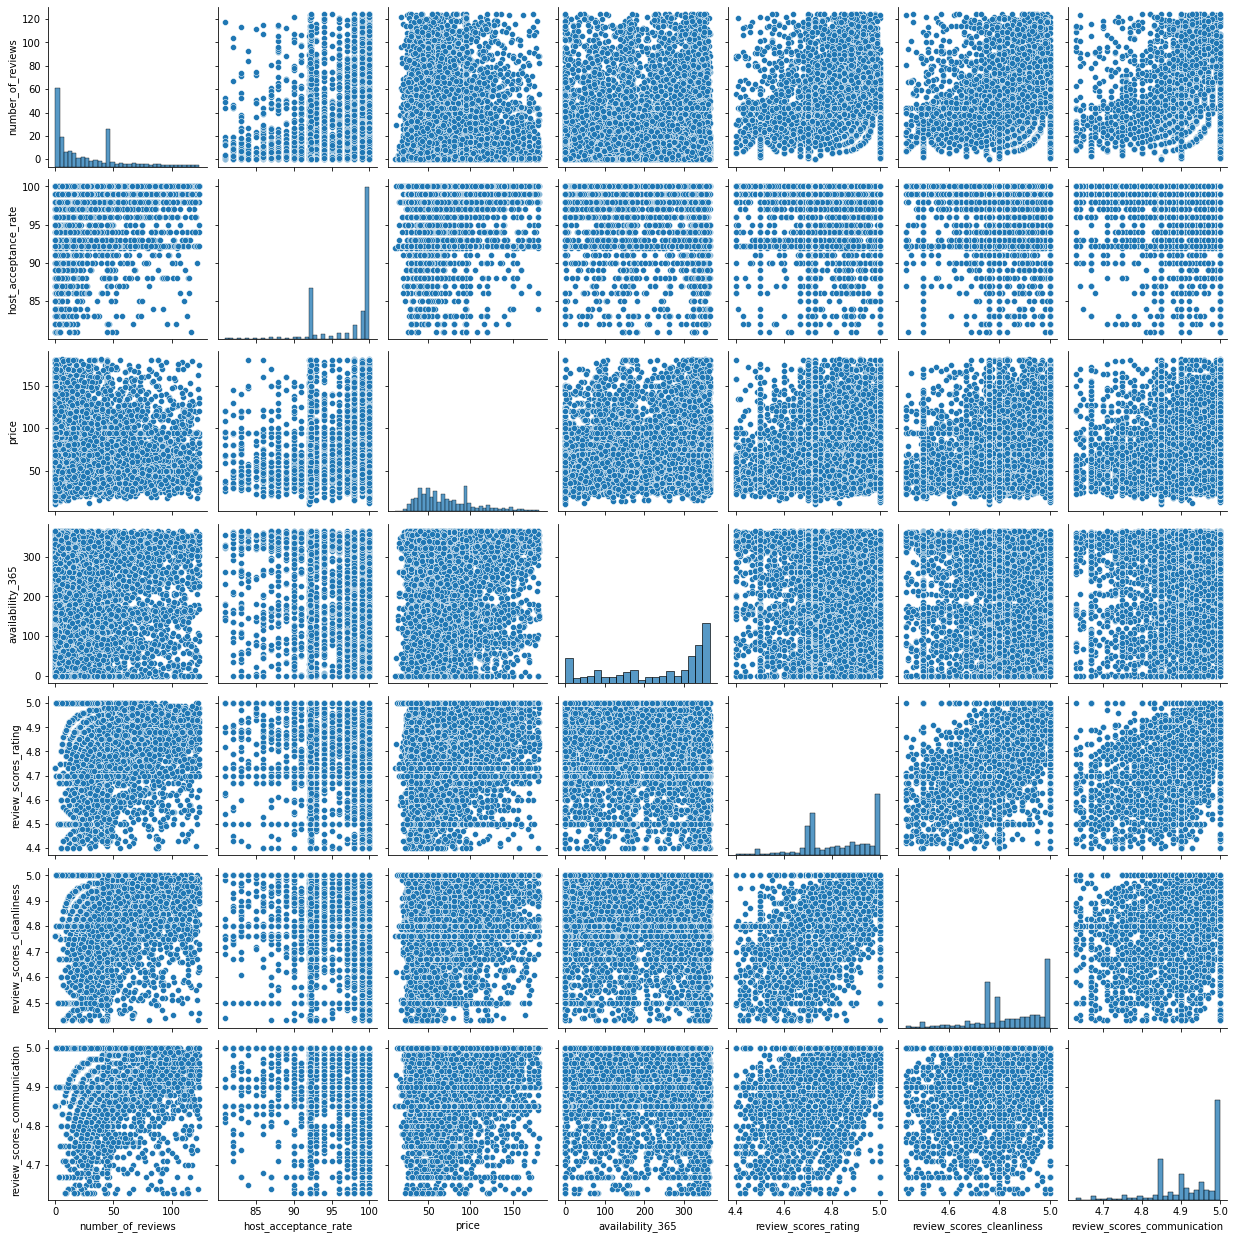

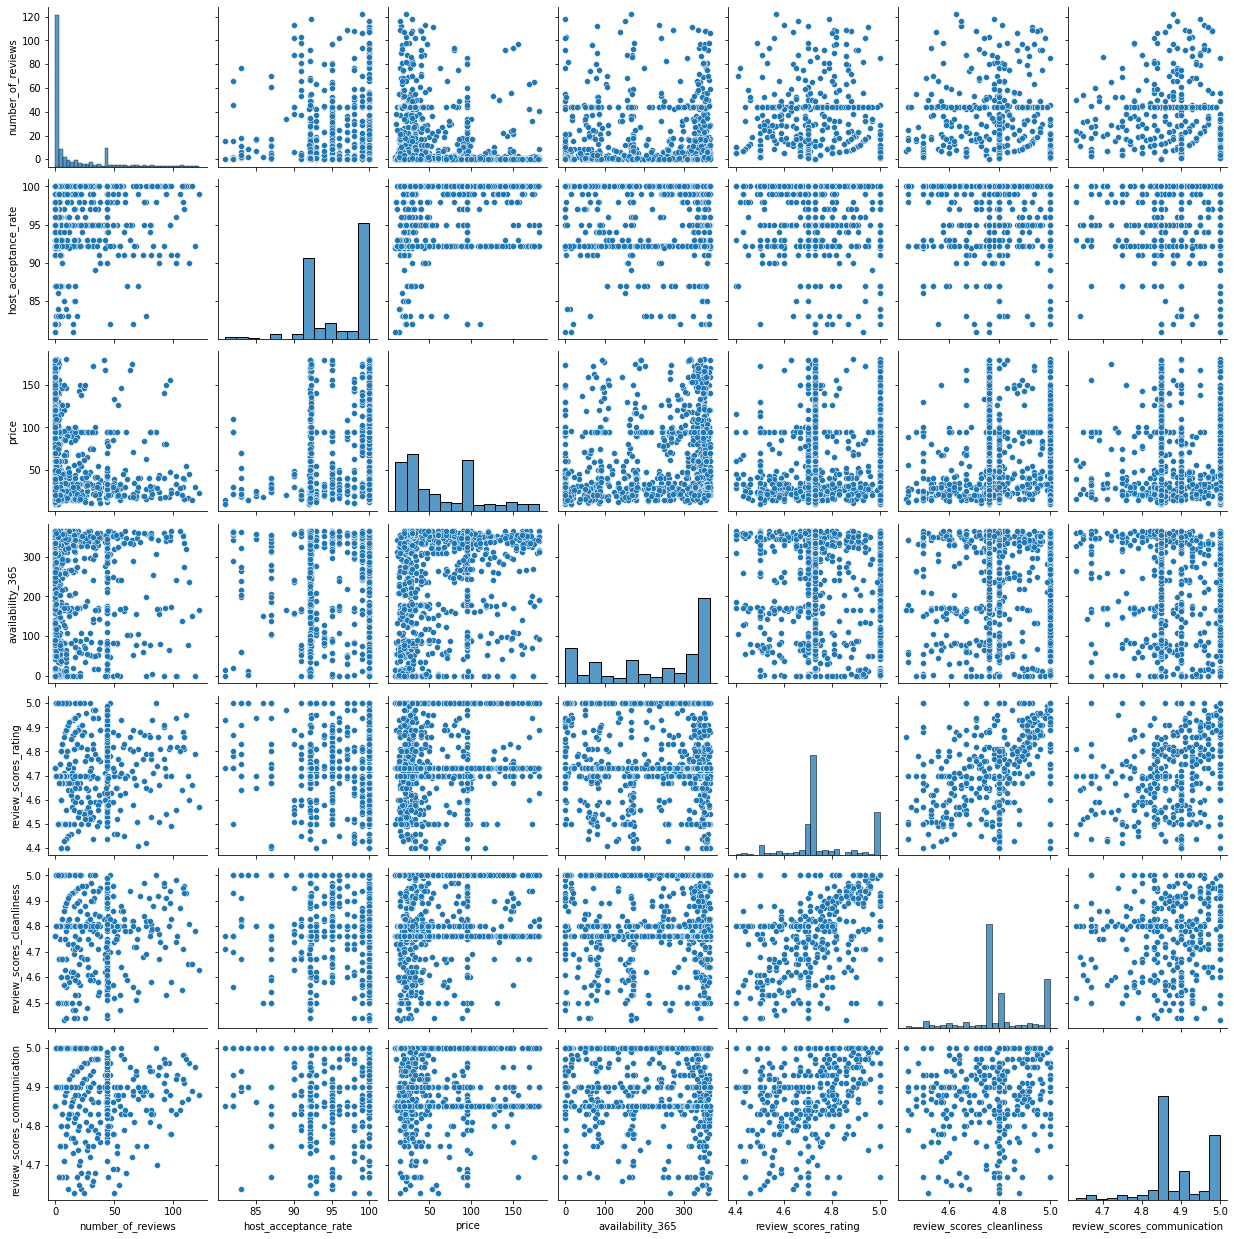

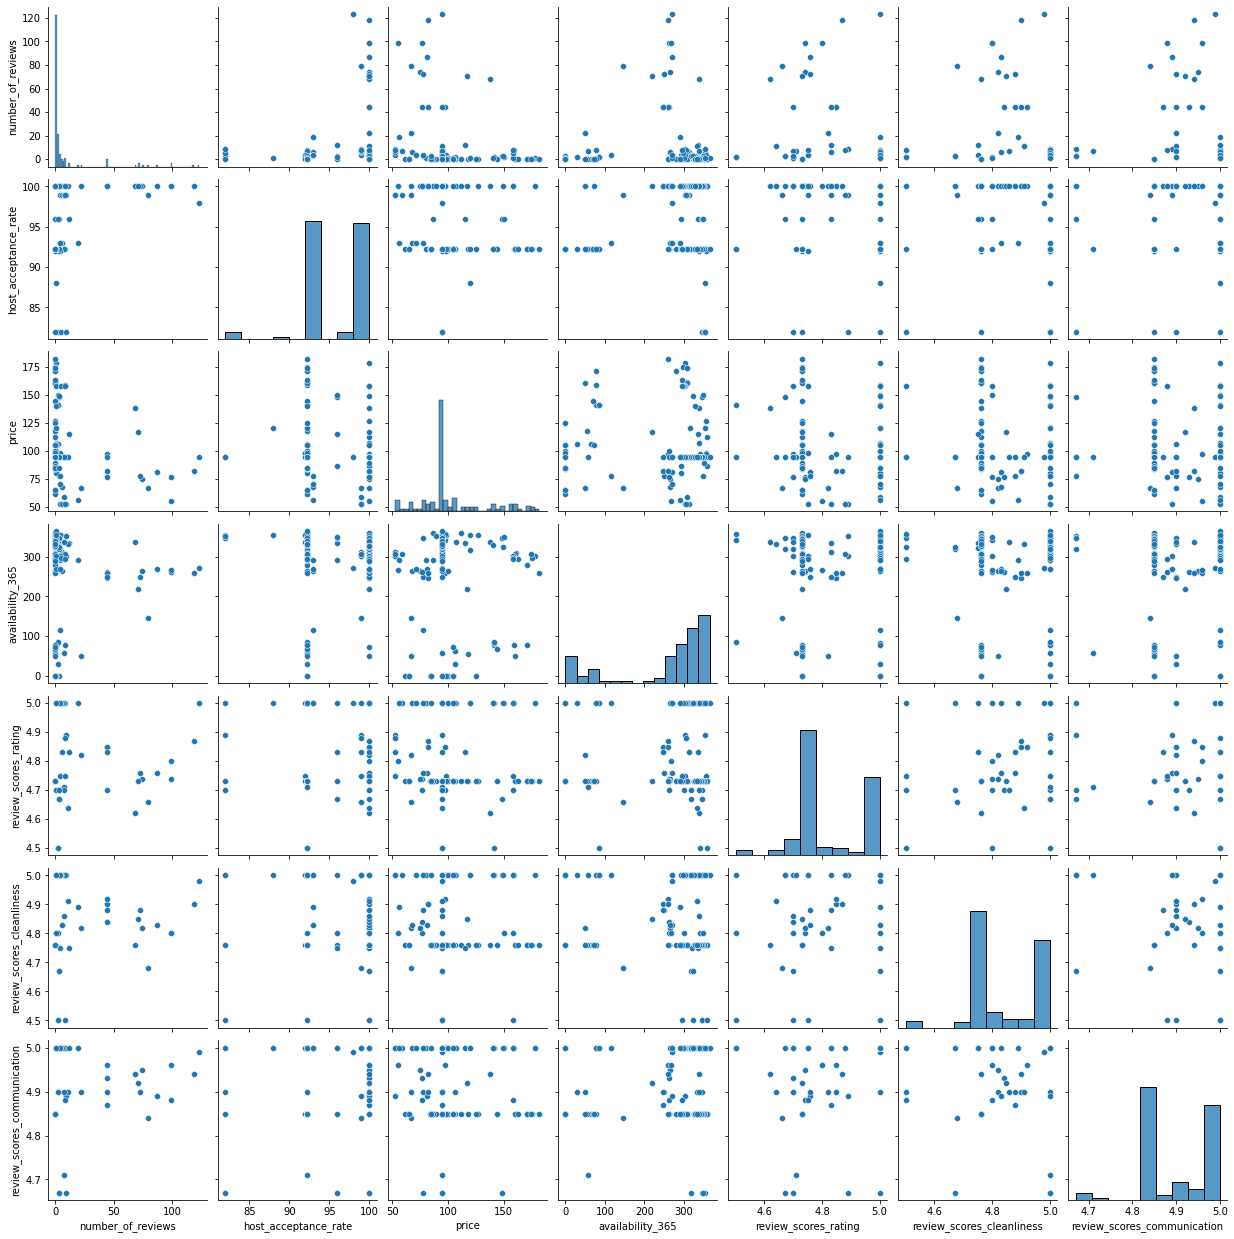

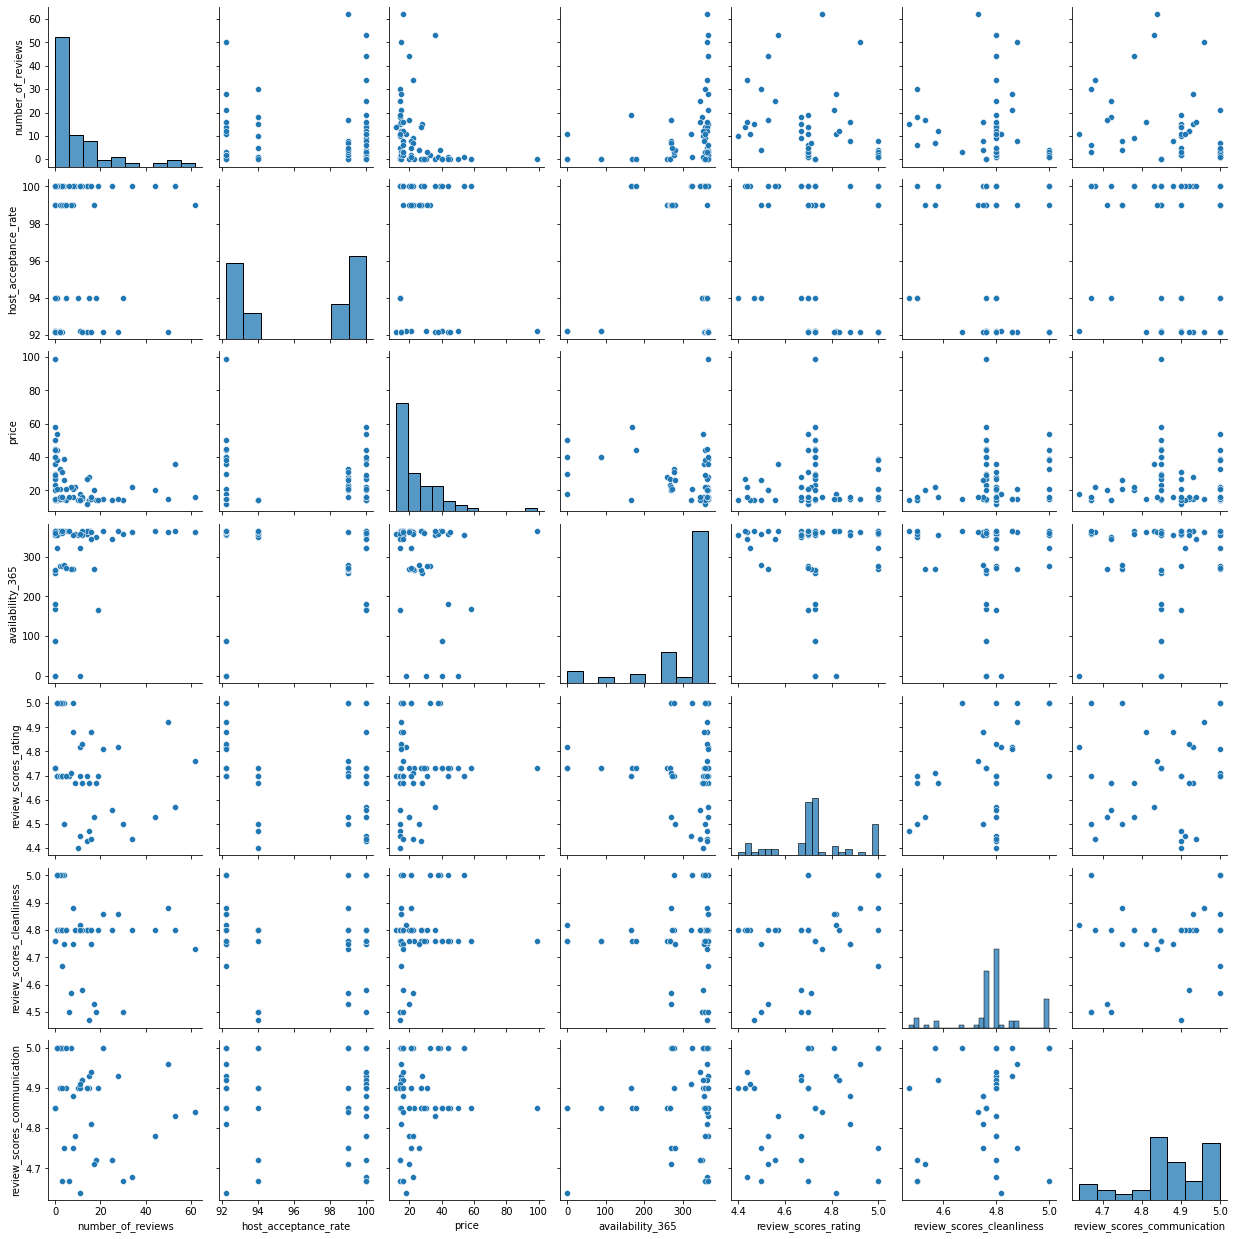

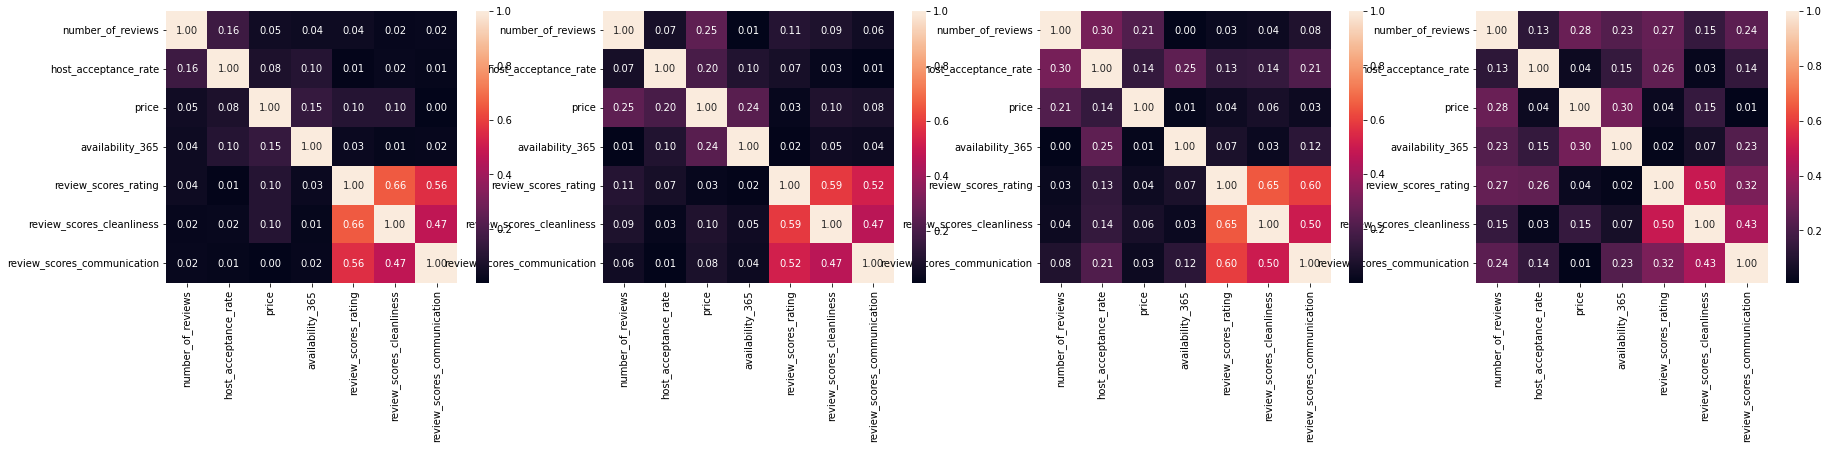

El mejor modelo para el dataset  Entire home/apt  es: y =  1.2263425275921414 *host_acceptance_rate  -92.95923926028586
El mejor modelo para el dataset  Hotel room  es: y =  1.6449025719864836 *host_acceptance_rate  -147.86096276087665
El mejor modelo para el dataset  Private room  es: y =  -0.13088483941955886 *price + 21.861597908745132
El mejor modelo para el dataset  Shared room  es: y =  -0.25967148246986294 *price + 15.797983524111693


0                     1  \
0                  Tipo de habitación       Entire home/apt   
1     Variables con mayor correlación  Host Acceptance Rate   
2      Coeficiente de Correlación (R)              0.162226   
3  Coeficiente de Determinación (R^2)              0.026317   

                      2             3            4  
0            Hotel room  Private room  Shared room  
1  Host Acceptance Rate         Price        Price  
2              0.303546      0.252706     0.280162  
3               0.09214       0.06386     0.078491

In [ ]:
#Se ocupa el mismo proceso para la extracción y limpieza de datos
df = pd.read_csv('Atenas.csv')
dff = df[['room_type', 'number_of_reviews', 'host_acceptance_rate','price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication']]
for i in dff.columns[1:]:
  if (dff[i].dtype == 'object'):
    for x,y in zip(dff[i], range(len(dff))):
      if (x!=NaN):
        z = str(x)
        z = z.replace('%','')
        z = z.replace(',','')
        z = z.replace('$','')
        dff[i][y] = z
    dff[i] = pd.to_numeric(dff[i], errors = 'coerce')
for i in dff.columns[1:]:
  if (dff[i].dtype == 'int64'):
    dff[i].fillna(round(dff[i].mean()), inplace = True)
  if (dff[i].dtype == 'float64'):
    dff[i].fillna(round(dff[i].mean(),2), inplace = True)
p25 = dff.quantile(0.25)
p75 = dff.quantile(0.75)
iqr = p75-p25
ls = p75 + 1.5*iqr
li = p25 - 1.5*iqr
dff1 = dff.loc[:, dff.columns != 'room_type'][(dff<=ls)&(dff>=li)]
dff1.fillna(round(dff.mean(),1), inplace = True)
dff1 = pd.concat([dff['room_type'], dff1], axis=1)
#dividir el dataframe por tipos de habitación
E = dff1[dff1['room_type'] == 'Entire home/apt']
P = dff1[dff1['room_type'] == 'Private room']
H = dff1[dff1['room_type'] == 'Hotel room']
S = dff1[dff1['room_type'] == 'Shared room']
sns.pairplot(E)
sns.pairplot(P)
sns.pairplot(H)
sns.pairplot(S)
#Observamos la dispersión de los valores comparando las columnas de cada dataset entre sí.
#Considerando que la variable objetivo es **number_of_reviews** no se observa una correlación significativa con las otras variables,
#se calcula que la correlación maxima seria un R = .2 en la variable host_acceptance_rate y un minimo de R=0 o correlación nula para variables como review_scores
f, ax = plt.subplots(1,4, figsize=(30, 5))
sns.heatmap(abs(E.corr()),annot=True, fmt=".2f", ax=ax[0])
sns.heatmap(abs(P.corr()), annot=True, fmt=".2f", ax=ax[1])
sns.heatmap(abs(H.corr()), annot=True, fmt=".2f", ax=ax[2])
sns.heatmap(abs(S.corr()),annot=True, fmt=".2f",  ax=ax[3])
plt.show()
#Con los mapas de calor representando los coeficientes de correlación se afirman los supuestos del bloque anterior en el que se esperaba un R= .2 como maximo y un R=0 como minimo.
#Para el dataset de 'Entire home/apt' la variable con mayor correlacion con un R= .16 es host_acceptance_rate
#Para el dataset de 'Private room' la variable con mayor correlacion con un R= .25 es price
#Para el dataset de 'Hotel room' la variable con mayor correlacion con un R= .30 tambien es host_acceptance_rate
#Para el dataset de 'Share room' la variable con mayor correlacion con un R= .28 tambien es price
l = [E, H]
n = [0,3]
o = ['Tipo de habitación']
cc = ['Coeficiente de Correlación (R)']
cd = ['Coeficiente de Determinación (R^2)']
for data, x in zip(l, n):
  model= LinearRegression()
  model.fit(X=data[['host_acceptance_rate']], y=data['number_of_reviews'])
  print('El mejor modelo para el dataset ', dff1['room_type'].unique()[x],' es: y = ', model.__dict__['coef_'][0],'*host_acceptance_rate ',model.__dict__['intercept_'])
  cd.append(model.score(data[['host_acceptance_rate']], data['number_of_reviews']))
  cc.append(np.sqrt(model.score(data[['host_acceptance_rate']], data['number_of_reviews'])))
  o.append(dff1['room_type'].unique()[x])
l = [P, S]
n = [1,2]
for data, x in zip(l, n):
  model= LinearRegression()
  model.fit(X=data[['price']], y=data['number_of_reviews'])
  print('El mejor modelo para el dataset ', dff1['room_type'].unique()[x],' es: y = ', model.__dict__['coef_'][0],'*price +',model.__dict__['intercept_'])
  cd.append(model.score(data[['price']], data['number_of_reviews']))
  cc.append(np.sqrt(model.score(data[['price']], data['number_of_reviews'])))
  o.append(dff1['room_type'].unique()[x])
varc = ['Variables con mayor correlación','Host Acceptance Rate', 'Host Acceptance Rate', 'Price', 'Price']
Tabla = [o,varc,cc,cd]
pd.DataFrame(Tabla)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return s

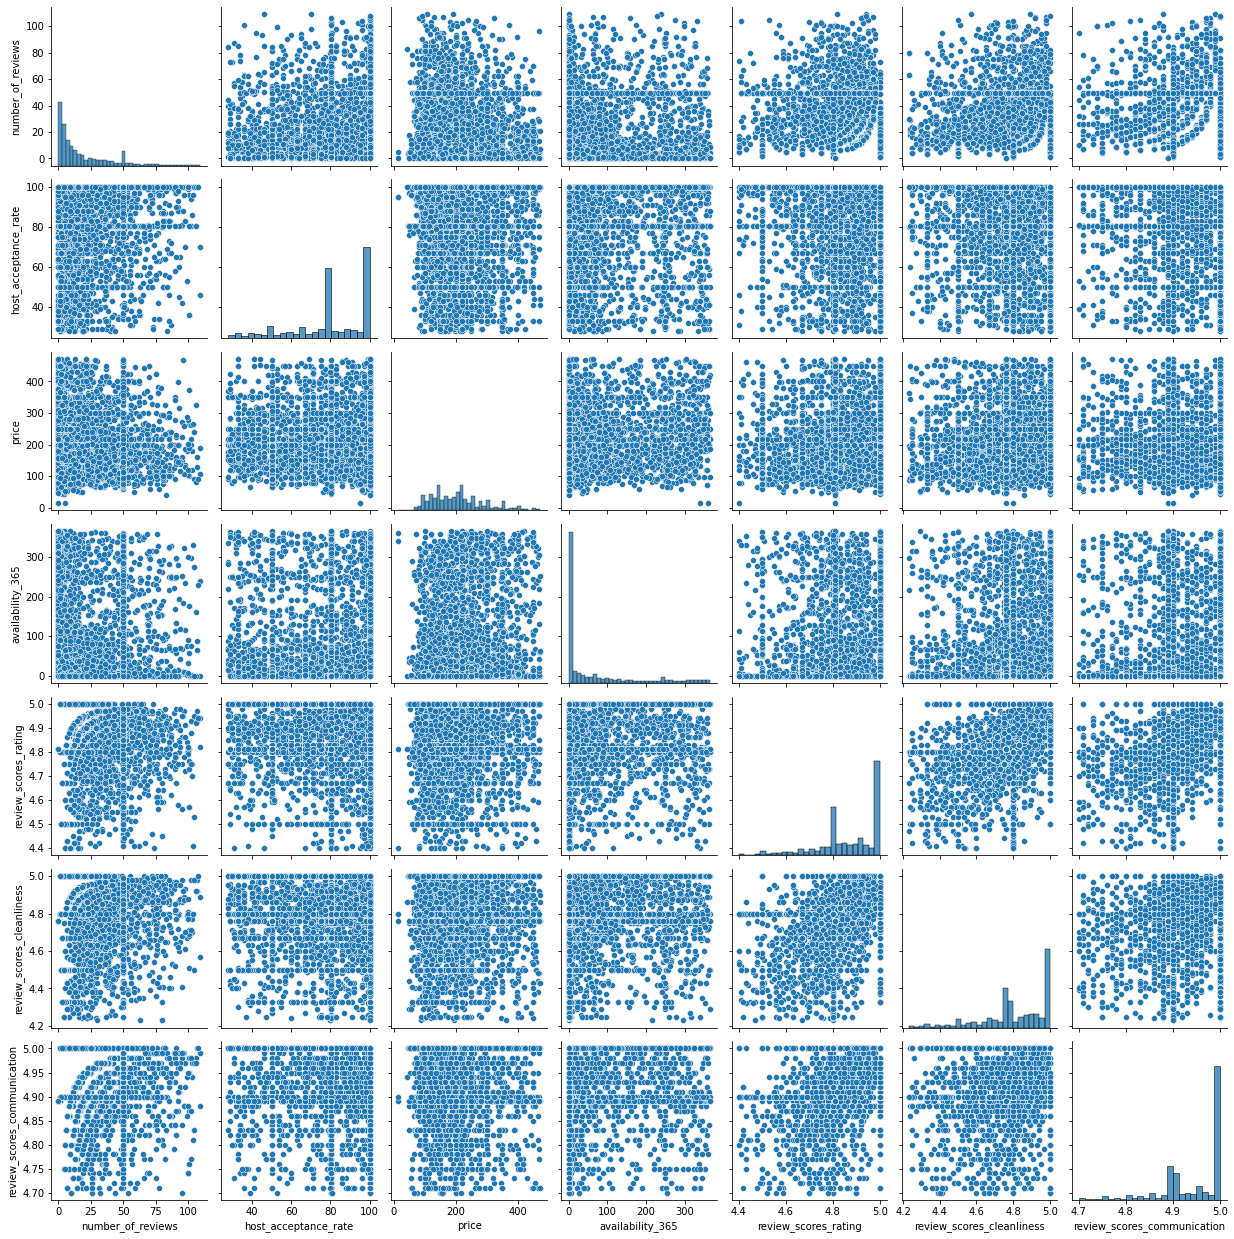

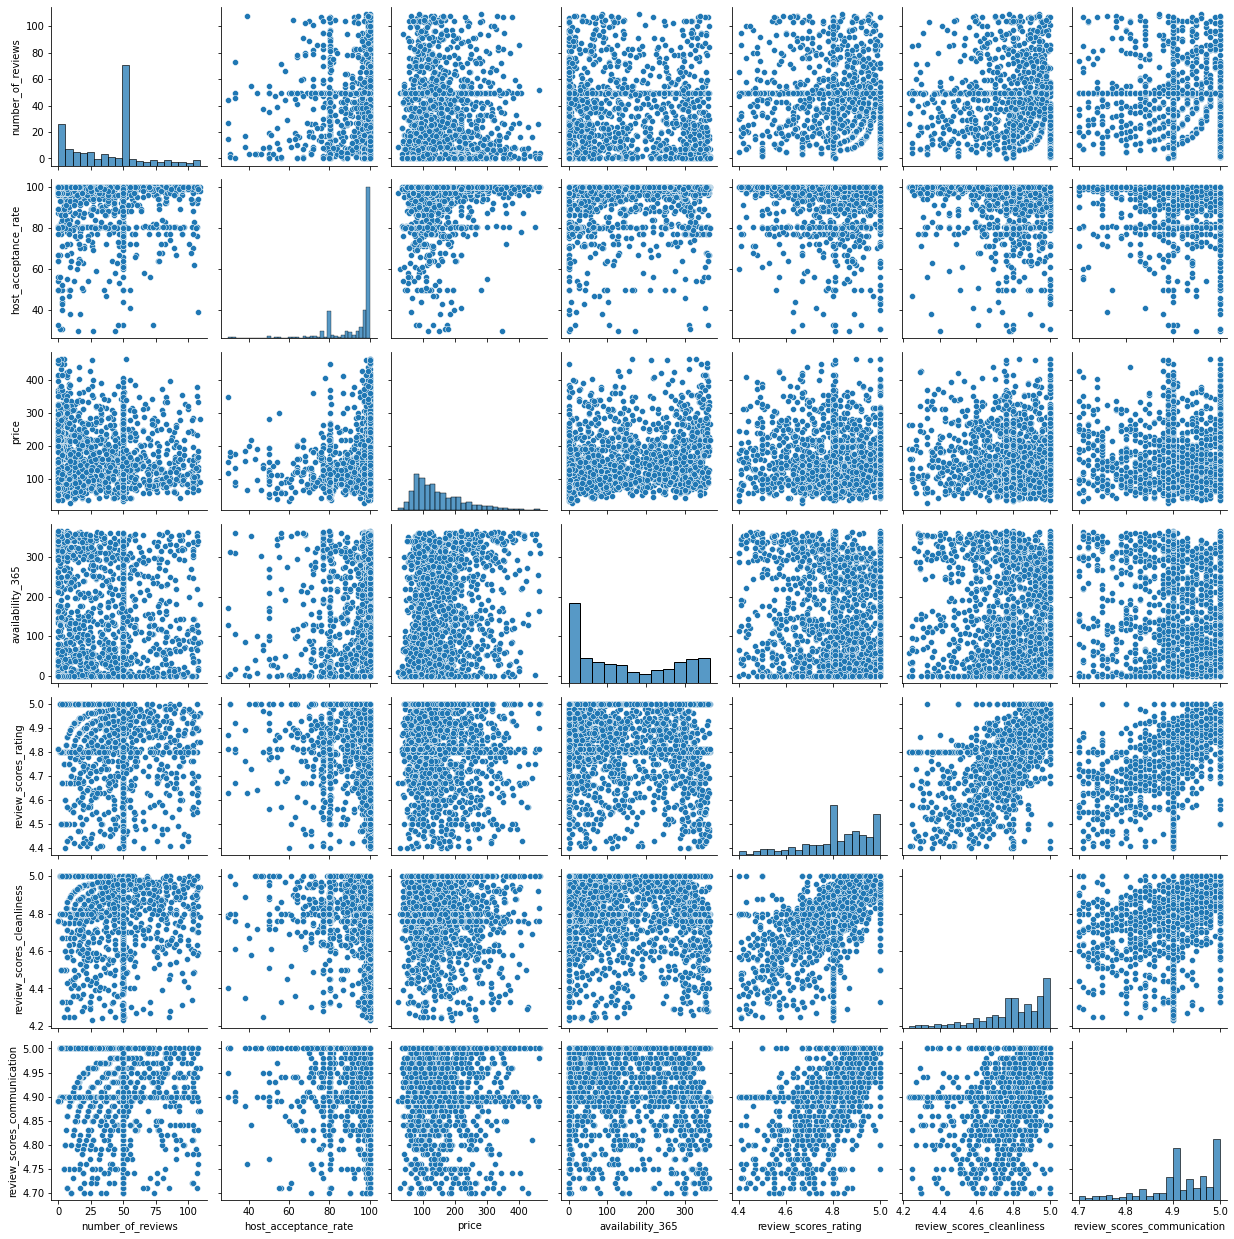

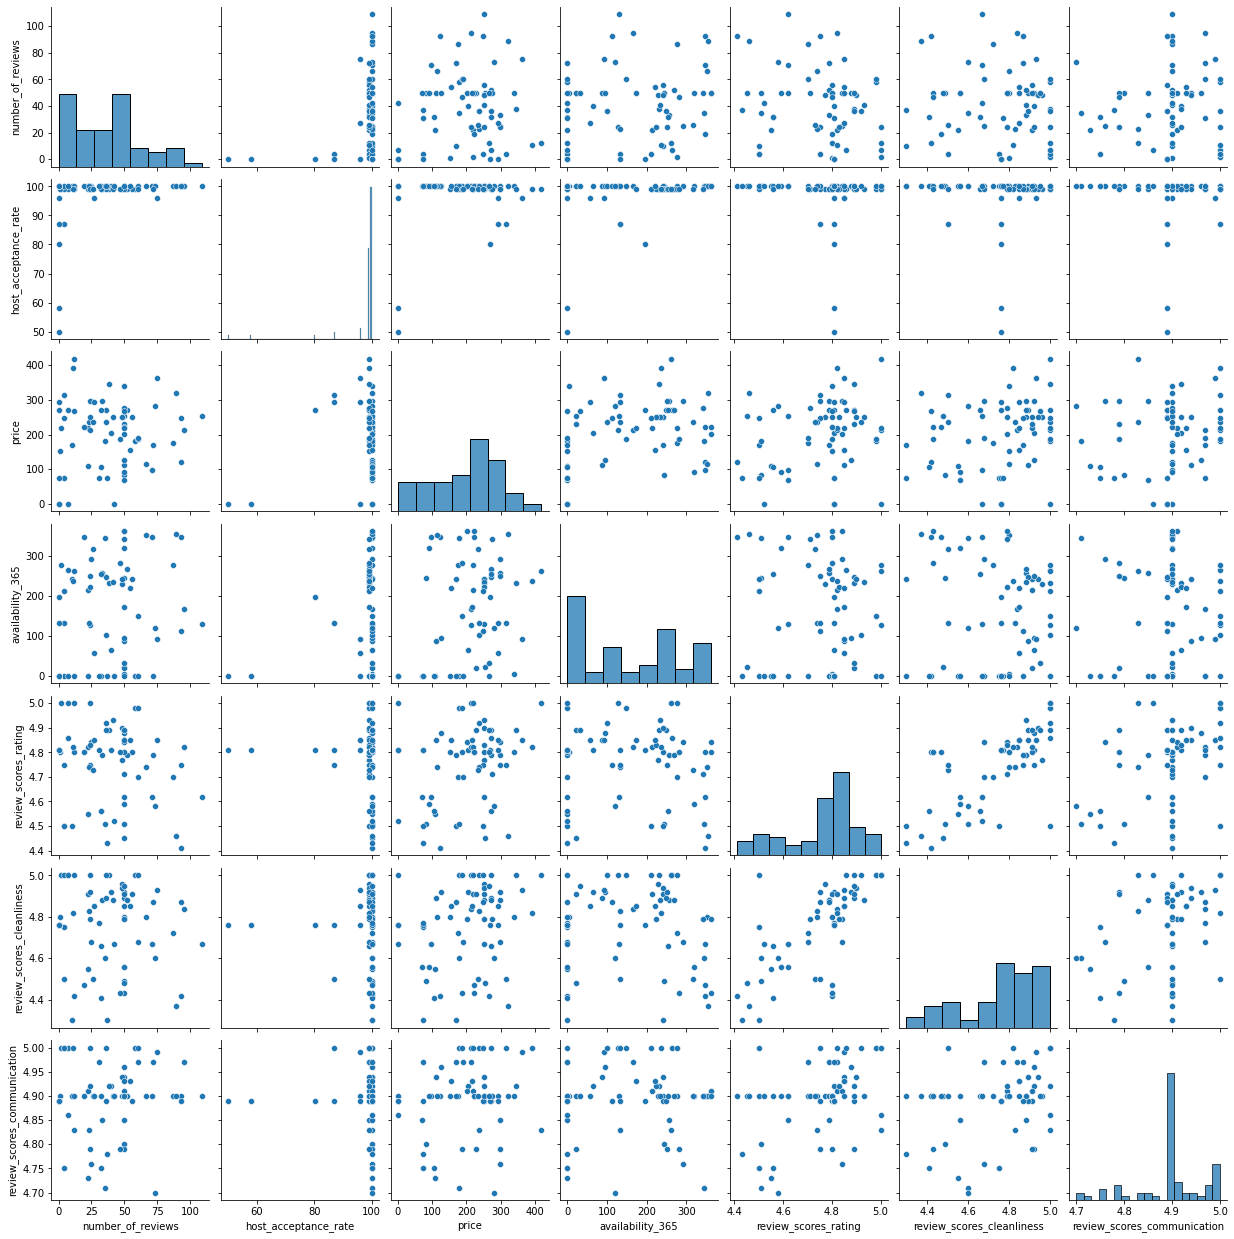

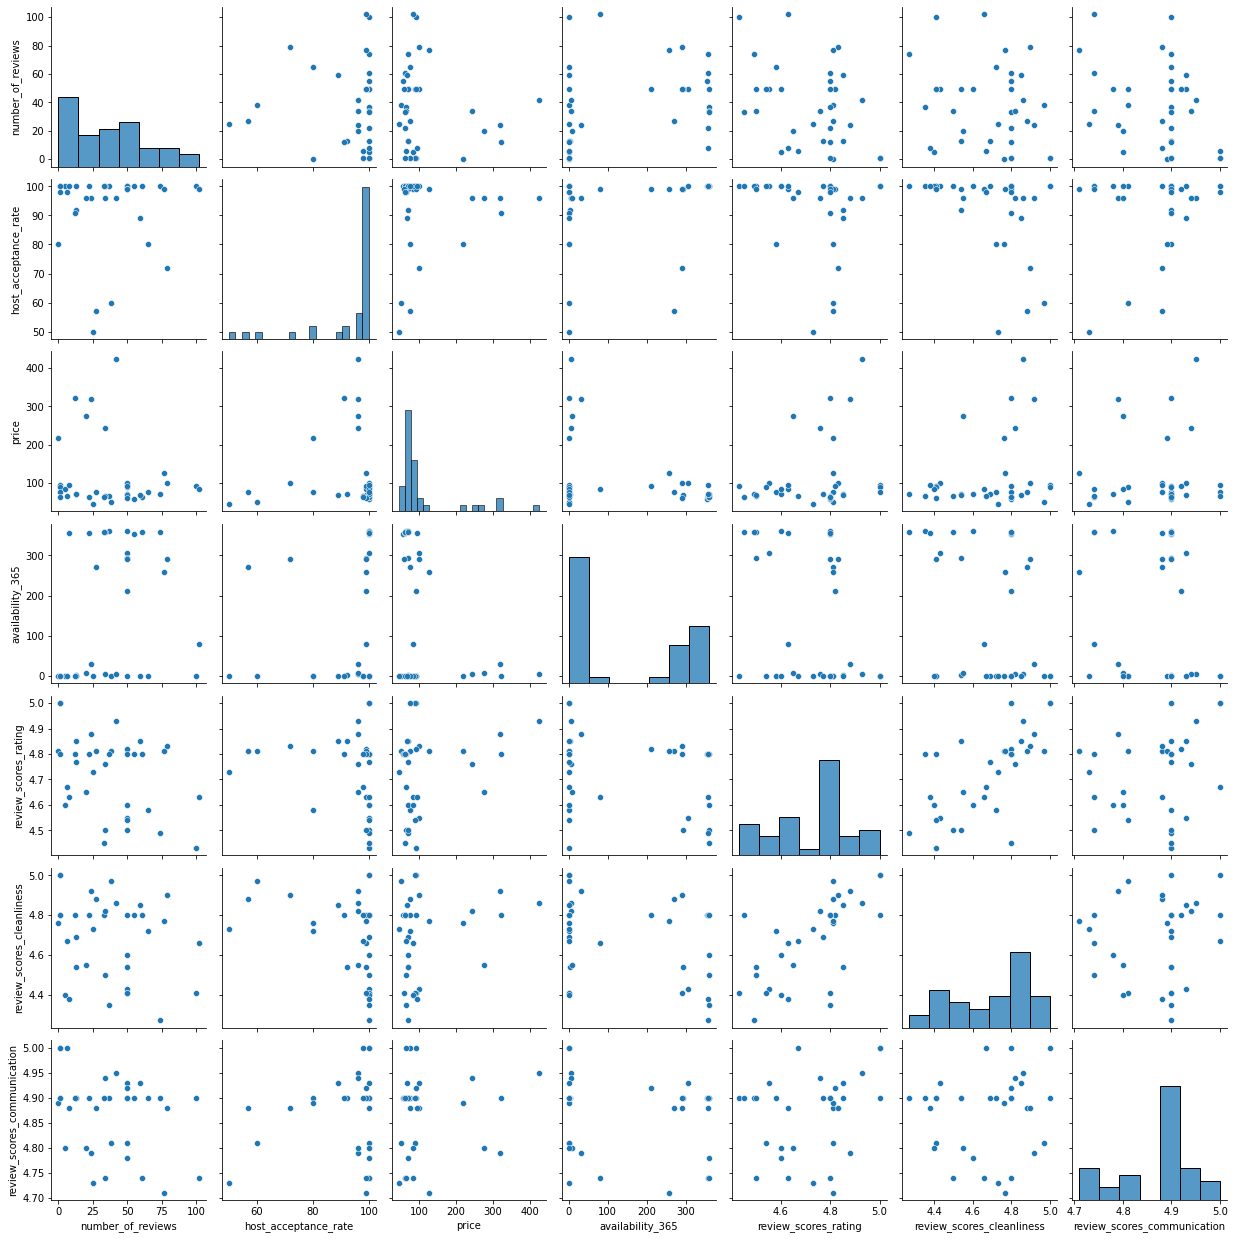

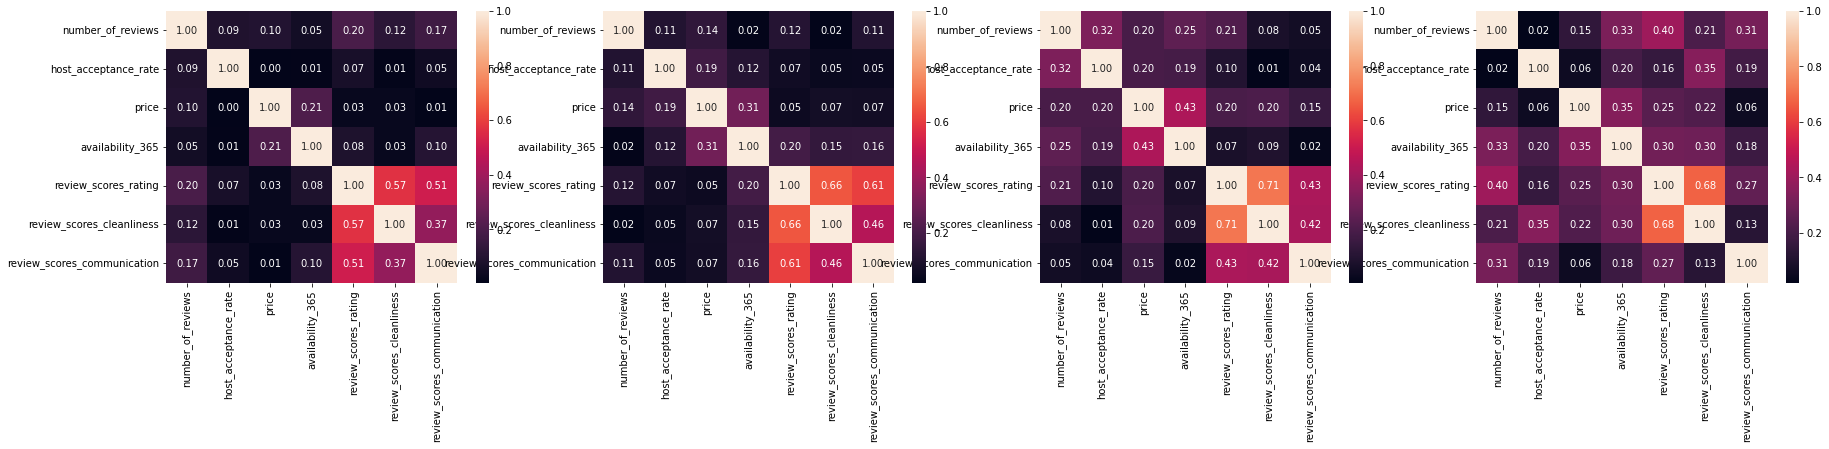

El mejor modelo para el dataset  Entire home/apt  es: y =  -31.57831362541099 *review_scores_rating + 172.1645958901621
El mejor modelo para el dataset  Shared room  es: y =  -72.62023927662278 *review_scores_rating + 380.58247277165174
El mejor modelo para el dataset  Private room  es: y =  -0.04574847907224517 *price +  46.05922369804776
El mejor modelo para el dataset  Hotel room  es: y =  1.1161793850048911 *host_acceptance_rate  -71.7480499420837


0                     1  \
0                  Tipo de habitación       Entire home/apt   
1     Variables con mayor correlación  Review Scores Rating   
2      Coeficiente de Correlación (R)               0.19784   
3  Coeficiente de Determinación (R^2)              0.039141   

                      2             3                     4  
0           Shared room  Private room            Hotel room  
1  Review Scores Rating         Price  Host Acceptance Rate  
2              0.404931      0.143984              0.323867  
3              0.163969      0.020731               0.10489

In [ ]:
#Se ocupa el mismo proceso para la extracción y limpieza de datos
df = pd.read_csv('Amsterdam.csv')
dff = df[['room_type', 'number_of_reviews', 'host_acceptance_rate','price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication']]
for i in dff.columns[1:]:
  if (dff[i].dtype == 'object'):
    for x,y in zip(dff[i], range(len(dff))):
      if (x!=NaN):
        z = str(x)
        z = z.replace('%','')
        z = z.replace(',','')
        z = z.replace('$','')
        dff[i][y] = z
    dff[i] = pd.to_numeric(dff[i], errors = 'coerce')
for i in dff.columns[1:]:
  if (dff[i].dtype == 'int64'):
    dff[i].fillna(round(dff[i].mean()), inplace = True)
  if (dff[i].dtype == 'float64'):
    dff[i].fillna(round(dff[i].mean(),2), inplace = True)
p25 = dff.quantile(0.25)
p75 = dff.quantile(0.75)
iqr = p75-p25
ls = p75 + 1.5*iqr
li = p25 - 1.5*iqr
dff1 = dff.loc[:, dff.columns != 'room_type'][(dff<=ls)&(dff>=li)]
dff1.fillna(round(dff.mean(),1), inplace = True)
dff1 = pd.concat([dff['room_type'], dff1], axis=1)
#dividir el dataframe por tipos de habitación
E = dff1[dff1['room_type'] == 'Entire home/apt']
P = dff1[dff1['room_type'] == 'Private room']
H = dff1[dff1['room_type'] == 'Hotel room']
S = dff1[dff1['room_type'] == 'Shared room']
sns.pairplot(E)
sns.pairplot(P)
sns.pairplot(H)
sns.pairplot(S)
#Observamos la dispersión de los valores comparando las columnas de cada dataset entre sí.
#Considerando que la variable objetivo es **number_of_reviews** no se observa una correlación significativa con las otras variables,
#se calcula que la correlación maxima seria un R = .2 en la variable host_acceptance_rate y un minimo de R=0 o correlación nula para variables como review_scores
f, ax = plt.subplots(1,4, figsize=(30, 5))
sns.heatmap(abs(E.corr()),annot=True, fmt=".2f", ax=ax[0])
sns.heatmap(abs(P.corr()), annot=True, fmt=".2f", ax=ax[1])
sns.heatmap(abs(H.corr()), annot=True, fmt=".2f", ax=ax[2])
sns.heatmap(abs(S.corr()),annot=True, fmt=".2f",  ax=ax[3])
plt.show()
#Con los mapas de calor representando los coeficientes de correlación se afirman los supuestos del bloque anterior en el que se esperaba un R= .2 como maximo y un R=0 como minimo.
#Para el dataset de 'Entire home/apt' la variable con mayor correlacion con un R= .20 es review_scores_rating
#Para el dataset de 'Private room' la variable con mayor correlacion con un R= .14 es price
#Para el dataset de 'Hotel room' la variable con mayor correlacion con un R= .32 es host_acceptance_rate
#Para el dataset de 'Share room' la variable con mayor correlacion con un R= .40 tambien es review_scores_rating

l = [E, S]
n = [1,3]
o = ['Tipo de habitación']
cc = ['Coeficiente de Correlación (R)']
cd = ['Coeficiente de Determinación (R^2)']
for data, x in zip(l, n):
  model= LinearRegression()
  model.fit(X=data[['review_scores_rating']], y=data['number_of_reviews'])
  print('El mejor modelo para el dataset ', dff1['room_type'].unique()[x],' es: y = ', model.__dict__['coef_'][0],'*review_scores_rating +',model.__dict__['intercept_'])
  cd.append(model.score(data[['review_scores_rating']], data['number_of_reviews']))
  cc.append(np.sqrt(model.score(data[['review_scores_rating']], data['number_of_reviews'])))
  o.append(dff1['room_type'].unique()[x])
model= LinearRegression()
model.fit(X=P[['price']], y=P['number_of_reviews'])
print('El mejor modelo para el dataset ', dff1['room_type'].unique()[0],' es: y = ', model.__dict__['coef_'][0],'*price + ',model.__dict__['intercept_'])
cd.append(model.score(P[['price']], P['number_of_reviews']))
cc.append(np.sqrt(model.score(P[['price']], P['number_of_reviews'])))
o.append(dff1['room_type'].unique()[0])
model= LinearRegression()
model.fit(X=H[['host_acceptance_rate']], y=H['number_of_reviews'])
print('El mejor modelo para el dataset ', dff1['room_type'].unique()[2],' es: y = ', model.__dict__['coef_'][0],'*host_acceptance_rate ',model.__dict__['intercept_'])
cd.append(model.score(H[['host_acceptance_rate']], H['number_of_reviews']))
cc.append(np.sqrt(model.score(H[['host_acceptance_rate']], H['number_of_reviews'])))
o.append(dff1['room_type'].unique()[2])
varc = ['Variables con mayor correlación','Review Scores Rating', 'Review Scores Rating','Price', 'Host Acceptance Rate']
Tabla = [o,varc,cc,cd]
pd.DataFrame(Tabla)